In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [0]:
# 手动one-hot，也可以使用keras.utils.np_utils.to_categorical
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for (i, label) in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [12]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=[x_val, y_val])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 239us/step - loss: 2.5891 - acc: 0.5554 - val_loss: 1.6740 - val_acc: 0.6440
Epoch 2/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.3862 - acc: 0.7212 - val_loss: 1.2804 - val_acc: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.0365 - acc: 0.7846 - val_loss: 1.1310 - val_acc: 0.7660
Epoch 4/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.8151 - acc: 0.8274 - val_loss: 1.0473 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.6567 - acc: 0.8604 - val_loss: 1.0108 - val_acc: 0.7790
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.5289 - acc: 0.8919 - val_loss: 0.9516 - val_acc: 0.7950
Epoch 7/20
7982/7982 [============

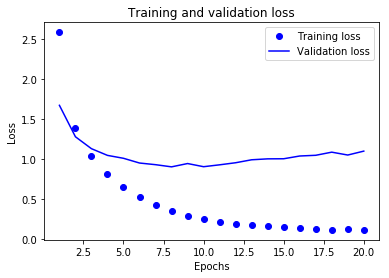

In [17]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

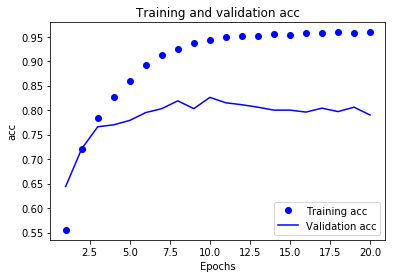

In [18]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [19]:
# 稍微有点过拟合，进行修正

model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
8982/8982 [==============================] - 1s 143us/step - loss: 0.2220 - acc: 0.9393
Epoch 2/9
8982/8982 [==============================] - 1s 121us/step - loss: 0.1705 - acc: 0.9490
Epoch 3/9
8982/8982 [==============================] - 1s 118us/step - loss: 0.1549 - acc: 0.9496
Epoch 4/9
8982/8982 [==============================] - 1s 121us/step - loss: 0.1437 - acc: 0.9527
Epoch 5/9
8982/8982 [==============================] - 1s 116us/step - loss: 0.1349 - acc: 0.9525
Epoch 6/9
8982/8982 [==============================] - 1s 118us/step - loss: 0.1283 - acc: 0.9537
Epoch 7/9
8982/8982 [==============================] - 1s 119us/step - loss: 0.1271 - acc: 0.9552
Epoch 8/9
8982/8982 [==============================] - 1s 117us/step - loss: 0.1251 - acc: 0.9556
Epoch 9/9
2246/2246 [==============================] - 0s 89us/step


In [20]:
results

[1.327552750189179, 0.7813891362687465]

In [23]:
# 尝试一下随机分配标签
test_labels_copy = test_labels.copy()
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
np.sum(hits_array) / len(test_labels)

0.17764915405164738